<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [13]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


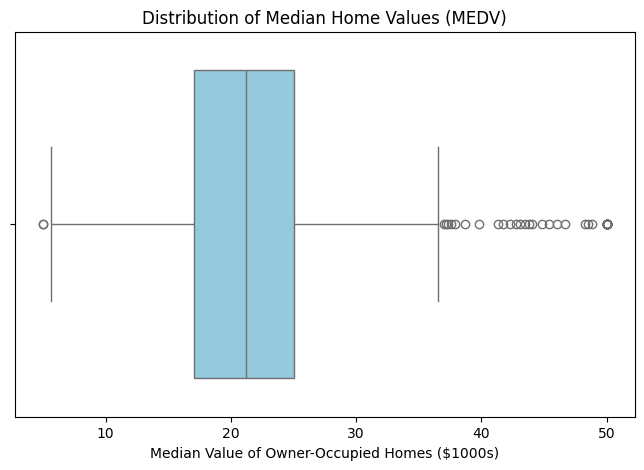

Interpretation → The boxplot shows spread and outliers in home values. If right-skewed, it indicates most homes are moderately priced with few very expensive ones.


In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Distribution of Median Home Values (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

print("Interpretation → The boxplot shows spread and outliers in home values. \
If right-skewed, it indicates most homes are moderately priced with few very expensive ones.")


<ipython-input-20-a63fa4cc00cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, hue=None, palette='pastel')


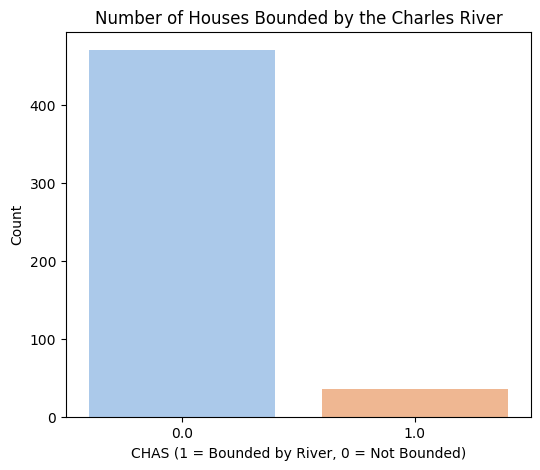

Interpretation → Displays how many tracts are beside the Charles River compared to those that are not.


In [20]:
plt.figure(figsize=(6,5))
sns.countplot(x='CHAS', data=boston_df, hue=None, palette='pastel')
plt.title('Number of Houses Bounded by the Charles River')
plt.xlabel('CHAS (1 = Bounded by River, 0 = Not Bounded)')
plt.ylabel('Count')
plt.show()

print("Interpretation → Displays how many tracts are beside the Charles River compared to those that are not.")

<ipython-input-21-1e9099137808>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, hue=None, palette='Set2')


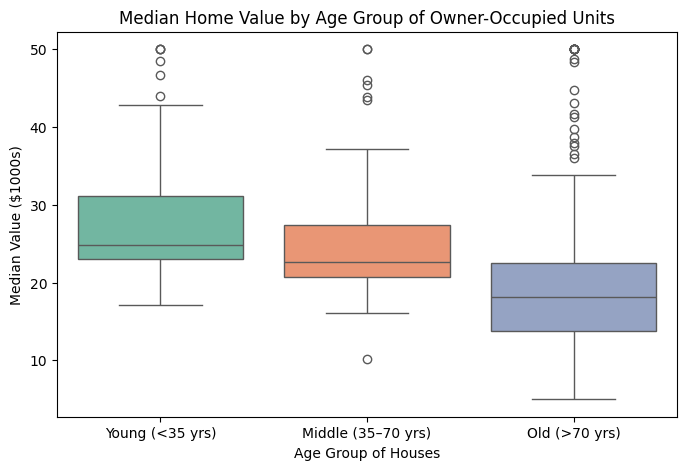

Interpretation → Helps compare if newer or older houses tend to have higher median values.


In [21]:
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0,35,70,100],
    labels=['Young (<35 yrs)', 'Middle (35–70 yrs)', 'Old (>70 yrs)']
)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, hue=None, palette='Set2')
plt.title('Median Home Value by Age Group of Owner-Occupied Units')
plt.xlabel('Age Group of Houses')
plt.ylabel('Median Value ($1000s)')
plt.show()

print("Interpretation → Helps compare if newer or older houses tend to have higher median values.")


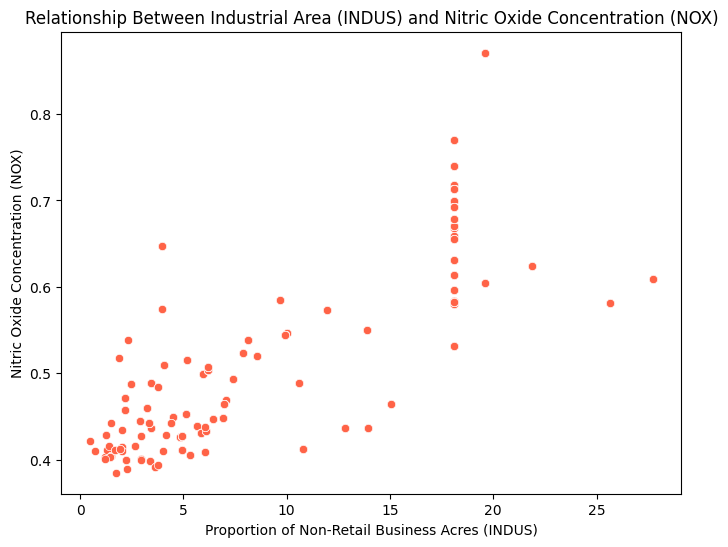

Interpretation → If points trend upward, higher industrial land is associated with higher NOX levels (pollution).


In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='tomato')
plt.title('Relationship Between Industrial Area (INDUS) and Nitric Oxide Concentration (NOX)')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

print("Interpretation → If points trend upward, higher industrial land is associated with higher NOX levels (pollution).")


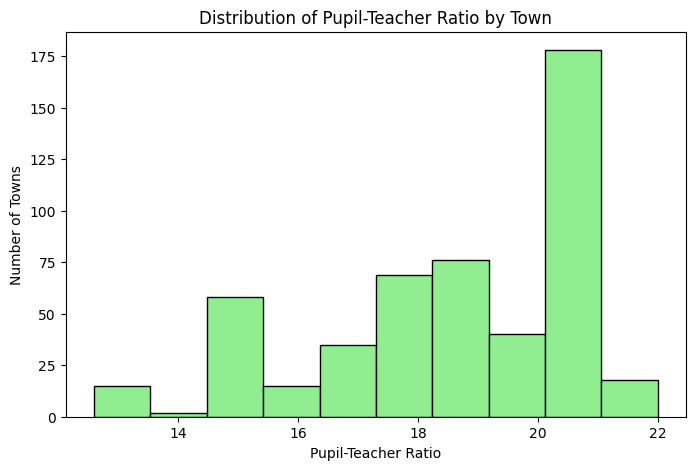

Interpretation → Shows the spread of education quality (lower PTRATIO indicates smaller class sizes).


In [23]:
plt.figure(figsize=(8,5))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black', color='lightgreen')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Number of Towns')
plt.show()

print("Interpretation → Shows the spread of education quality (lower PTRATIO indicates smaller class sizes).")

In [24]:
#Hypotheses:

#H₀: There is no significant difference in MEDV for houses near vs not near the Charles River.

#H₁: There is a significant difference.


In [25]:
from scipy.stats import ttest_ind

chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(chas_yes, chas_no)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("✅ Reject H₀: There is a significant difference in MEDV between the two groups.")
else:
    print("❌ Fail to reject H₀: No significant difference found.")

T-statistic: 3.996
P-value: 0.000
✅ Reject H₀: There is a significant difference in MEDV between the two groups.


In [26]:
#Hypotheses:

#H₀: All age groups have the same mean MEDV.

#H₁: At least one age group has a different mean.


In [27]:
from scipy.stats import f_oneway

young = boston_df[boston_df['AGE'] <= 35]['MEDV']
middle = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
old = boston_df[boston_df['AGE'] > 70]['MEDV']

f_stat, p_val = f_oneway(young, middle, old)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("✅ Reject H₀: There is a difference in MEDV among age groups.")
else:
    print("❌ Fail to reject H₀: No difference found.")

F-statistic: 36.408
P-value: 0.000
✅ Reject H₀: There is a difference in MEDV among age groups.


In [28]:
#Hypotheses:

#H₀: No correlation between NOX and INDUS.

#H₁: There is a correlation.

In [29]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < 0.05:
    print("✅ Reject H₀: Significant correlation exists.")
else:
    print("❌ Fail to reject H₀: No significant relationship.")

Correlation coefficient: 0.764
P-value: 0.000
✅ Reject H₀: Significant correlation exists.


In [30]:
#Hypotheses:

#H₀: Distance (DIS) has no impact on MEDV.

#H₁: Distance (DIS) impacts MEDV.

In [ ]:
import statsmodels.api as sm

X = boston_df[['DIS']]
y = boston_df['MEDV']

X = sm.add_constant(X)
